In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import r2_score

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# import the regressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [3]:
import pandas as pd

# Read the RF dataset from CSV file
data = pd.read_csv('RFLFSODataFull.csv')

print("Dataset:")
data.head(5)

Dataset:


,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


In [4]:
# Check the dimensions of the RF dataset
print("\nRF Dataset Dimensions:")
data.shape


RF Dataset Dimensions:


(91379, 27)

In [5]:
# Calculate summary statistics for the RF dataset
print("\nRF Dataset Summary Statistics:")
data.describe()


RF Dataset Summary Statistics:


,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
count,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,9.137900e+04,91379.000000,91379.000000,91379.000000,...,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000
mean,6.769458,11.619098,9.553919,10.032760,9.076251,3297.930328,7.850005e+10,27.065979,28.417120,25.717089,...,13.166020,11.904558,11.373193,32986.417484,34636.684647,31331.618978,89.043304,0.739065,1.851020,0.702242
std,3.903843,3.438873,5.858577,6.162798,5.575927,1224.305893,5.000027e+09,72.134023,75.761896,68.595239,...,9.589755,8.694028,6.942229,24713.874445,25978.845228,23497.873065,26.415610,0.871314,1.762698,0.828796
min,0.788363,0.027142,1.141556,1.238270,1.049744,2012.000148,7.350000e+10,0.000000,0.000000,0.000000,...,-6.693373,-7.270075,0.000000,10.151990,11.029667,9.484346,0.000000,0.000000,0.000000,0.000000
25%,3.473063,10.829331,4.958993,5.205861,4.709511,2019.431812,7.350000e+10,0.000000,0.000000,0.000000,...,4.905387,4.438425,5.000000,11158.598400,11721.447542,10588.793237,82.976727,0.076749,0.512667,0.072912
50%,6.336167,11.856560,6.870737,7.205499,6.524046,2959.863686,8.350000e+10,0.000000,0.000000,0.000000,...,10.803943,9.774467,11.000000,26378.636210,27686.214032,25047.188462,90.867362,0.437995,1.323101,0.416274
75%,8.664984,12.847944,14.049470,14.782679,13.379256,4820.890157,8.350000e+10,16.947618,17.775980,16.038090,...,22.470382,20.322434,17.000000,53493.821285,56092.212376,50797.690402,98.482652,1.088621,2.681788,1.036574
max,32.455222,46.893150,24.790883,26.407305,24.268431,4827.999971,8.350000e+10,1621.001906,1753.747866,1500.666382,...,40.771383,36.724191,23.000000,75004.999150,82503.130084,74999.343414,360.000000,7.799086,16.421115,7.252319


In [6]:
# Check the data types of each column in the RF dataset
print("\nRF Dataset Data Types:")
data.dtypes


RF Dataset Data Types:


FSO_Att                  float64
RFL_Att                  float64
AbsoluteHumidity         float64
AbsoluteHumidityMax      float64
AbsoluteHumidityMin      float64
Distance                 float64
Frequency                  int64
Particulate              float64
ParticulateMax           float64
ParticulateMin           float64
RainIntensity            float64
RainIntensityMax         float64
RainIntensityMin         float64
RelativeHumidity         float64
SYNOPCode                  int64
Temperature              float64
TemperatureDifference    float64
TemperatureMax           float64
TemperatureMin           float64
Time                       int64
Visibility               float64
VisibilityMax            float64
VisibilityMin            float64
WindDirection            float64
WindSpeed                float64
WindSpeedMax             float64
WindSpeedMin             float64
dtype: object

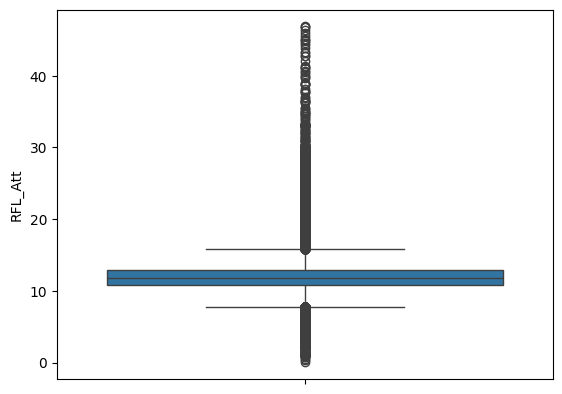

In [7]:
# Identify any outliers or anomalies
sns.boxplot(data=data['RFL_Att'])
plt.show()

# For FSO

In [8]:
fso_data = data.drop("RFL_Att", axis = 1).copy()

In [9]:
fso_data.head(1)

,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,0.0,...,26.60303,24.680849,9,65884.51846,72336.362233,65617.543754,88.75545,3.057066,6.863808,3.007939


In [10]:
fso_data['SYNOPCode'] = fso_data['SYNOPCode'].astype('category')

# 检查转换结果
print(fso_data.dtypes)  # 检查列的数据类型
print(fso_data['SYNOPCode'].head())  # 查看前几行数据


FSO_Att                   float64
AbsoluteHumidity          float64
AbsoluteHumidityMax       float64
AbsoluteHumidityMin       float64
Distance                  float64
Frequency                   int64
Particulate               float64
ParticulateMax            float64
ParticulateMin            float64
RainIntensity             float64
RainIntensityMax          float64
RainIntensityMin          float64
RelativeHumidity          float64
SYNOPCode                category
Temperature               float64
TemperatureDifference     float64
TemperatureMax            float64
TemperatureMin            float64
Time                        int64
Visibility                float64
VisibilityMax             float64
VisibilityMin             float64
WindDirection             float64
WindSpeed                 float64
WindSpeedMax              float64
WindSpeedMin              float64
dtype: object
0    0
1    0
2    0
3    0
4    0
Name: SYNOPCode, dtype: category
Categories (7, int64): [0, 3, 4, 5

In [11]:
print(fso_data['SYNOPCode'].value_counts())

SYNOPCode
0    56964
6    25018
5     6605
8     1716
4      466
7      419
3      191
Name: count, dtype: int64


In [12]:
print("\nRF Dataset Summary Statistics:")
fso_data.describe()


RF Dataset Summary Statistics:


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
count,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,9.137900e+04,91379.000000,91379.000000,91379.000000,91379.000000,...,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000
mean,6.769458,9.553919,10.032760,9.076251,3297.930328,7.850005e+10,27.065979,28.417120,25.717089,0.246973,...,13.166020,11.904558,11.373193,32986.417484,34636.684647,31331.618978,89.043304,0.739065,1.851020,0.702242
std,3.903843,5.858577,6.162798,5.575927,1224.305893,5.000027e+09,72.134023,75.761896,68.595239,1.642323,...,9.589755,8.694028,6.942229,24713.874445,25978.845228,23497.873065,26.415610,0.871314,1.762698,0.828796
min,0.788363,1.141556,1.238270,1.049744,2012.000148,7.350000e+10,0.000000,0.000000,0.000000,0.000000,...,-6.693373,-7.270075,0.000000,10.151990,11.029667,9.484346,0.000000,0.000000,0.000000,0.000000
25%,3.473063,4.958993,5.205861,4.709511,2019.431812,7.350000e+10,0.000000,0.000000,0.000000,0.000000,...,4.905387,4.438425,5.000000,11158.598400,11721.447542,10588.793237,82.976727,0.076749,0.512667,0.072912
50%,6.336167,6.870737,7.205499,6.524046,2959.863686,8.350000e+10,0.000000,0.000000,0.000000,0.000000,...,10.803943,9.774467,11.000000,26378.636210,27686.214032,25047.188462,90.867362,0.437995,1.323101,0.416274
75%,8.664984,14.049470,14.782679,13.379256,4820.890157,8.350000e+10,16.947618,17.775980,16.038090,0.000000,...,22.470382,20.322434,17.000000,53493.821285,56092.212376,50797.690402,98.482652,1.088621,2.681788,1.036574
max,32.455222,24.790883,26.407305,24.268431,4827.999971,8.350000e+10,1621.001906,1753.747866,1500.666382,87.264777,...,40.771383,36.724191,23.000000,75004.999150,82503.130084,74999.343414,360.000000,7.799086,16.421115,7.252319


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def feature_selection(data, target_column, drop_columns, rmse_threshold=0.1, r2_threshold=0.02):
    # 1. 移除指定列
    data = data.drop(columns=drop_columns, errors='ignore')
    
    # 2. 分离特征和目标变量
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # 3. 初始化随机森林模型
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    
    # 记录重要特征和性能指标
    rmse_list = []
    r2_list = []
    removed_features = []
    decisions = []  # 用于记录每一步的选择和原因
    
    # 当前特征列表
    current_features = list(X.columns)
    
    # 初始化基线性能
    model.fit(X[current_features], y)
    baseline_rmse = mean_squared_error(y, model.predict(X[current_features]), squared=False)
    baseline_r2 = r2_score(y, model.predict(X[current_features]))
    rmse_list.append(baseline_rmse)
    r2_list.append(baseline_r2)

    print(f"Initial RMSE: {baseline_rmse}, R²: {baseline_r2}")
    
    while len(current_features) > 1:
        # 4. 训练模型
        model.fit(X[current_features], y)
        
        # 5. 预测并计算性能
        y_pred = model.predict(X[current_features])
        rmse = mean_squared_error(y, y_pred, squared=False)
        r2 = r2_score(y, y_pred)
        
        # 记录当前性能
        rmse_list.append(rmse)
        r2_list.append(r2)
        
        # 找到最不重要的特征
        feature_importances = model.feature_importances_
        least_important_feature_idx = np.argmin(feature_importances)
        least_important_feature = current_features[least_important_feature_idx]
        
        # 计算 RMSE 和 R² 的变化
        rmse_increase = rmse - baseline_rmse
        r2_decrease = baseline_r2 - r2

        # 打印当前状态
        print(f"Removing feature: {least_important_feature}")
        print(f"RMSE increase: {rmse_increase:.3f}, R² decrease: {r2_decrease:.3f}")
        
        # 决策是否移除特征
        if rmse_increase > rmse_threshold or r2_decrease > r2_threshold:
            print(f"Stopping selection. RMSE increase ({rmse_increase:.3f}) > {rmse_threshold} or R² decrease ({r2_decrease:.3f}) > {r2_threshold}")
            decisions.append(f"Stop: RMSE increase {rmse_increase:.3f}, R² decrease {r2_decrease:.3f}")
            break
        else:
            # 移除特征并更新基线性能
            removed_features.append(least_important_feature)
            current_features.pop(least_important_feature_idx)
            baseline_rmse = rmse
            baseline_r2 = r2
            decisions.append(f"Removed: {least_important_feature}")

    # 绘制 RMSE 和 R² 变化
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # 绘制 RMSE 曲线
    ax1.plot(range(len(rmse_list)), rmse_list, 'b-o', label='RMSE')
    ax1.set_xlabel('Number of Features Removed', fontsize=12)
    ax1.set_ylabel('RMSE (dB)', color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.tick_params(axis='x', rotation=45)  # 旋转 X 轴标签
    ax1.grid(alpha=0.5)

    ax1.set_xticks(range(len(removed_features)))  
    ax1.set_xticklabels(removed_features, fontsize=10)
    # 绘制 R² 曲线
    ax2 = ax1.twinx()
    ax2.plot(range(len(r2_list)), r2_list, 'y-s', label='$R^2$', markersize=6)
    ax2.set_ylabel('$R^2$', color='gold', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='gold')

    # 添加标题和图例
    plt.title('Feature Selection Process - RMSE and $R^2$', fontsize=14, pad=20)
    fig.tight_layout()  # 自动调整布局避免标签重叠
    fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85), fontsize=10)
    plt.show()

    # 输出最终结果
    print("Important Features:", current_features)
    print("Removed Features:", removed_features)
    print("Decisions Log:")
    for decision in decisions:
        print(decision)
    
    return current_features, removed_features, rmse_list, r2_list, decisions



C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Initial RMSE: 0.2817088211871882, R²: 0.9947926010486952


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Frequency
RMSE increase: 0.000, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RainIntensityMin
RMSE increase: 0.000, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RainIntensityMax
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: SYNOPCode
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindDirection
RMSE increase: 0.000, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RainIntensity
RMSE increase: -0.004, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindSpeedMin
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: AbsoluteHumidityMin
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: AbsoluteHumidityMax
RMSE increase: -0.002, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindSpeed
RMSE increase: -0.003, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindSpeedMax
RMSE increase: 0.004, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: TemperatureMax
RMSE increase: 0.006, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: VisibilityMax
RMSE increase: -0.003, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: TemperatureDifference
RMSE increase: -0.002, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: ParticulateMax
RMSE increase: 0.029, R² decrease: 0.001


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RelativeHumidity
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Time
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: TemperatureMin
RMSE increase: 0.092, R² decrease: 0.004


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Particulate
RMSE increase: -0.003, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: AbsoluteHumidity
RMSE increase: 0.001, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: VisibilityMin
RMSE increase: 0.094, R² decrease: 0.005


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: ParticulateMin
RMSE increase: -0.002, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Temperature
RMSE increase: 0.185, R² decrease: 0.014
Stopping selection. RMSE increase (0.185) > 0.1 or R² decrease (0.014) > 0.02


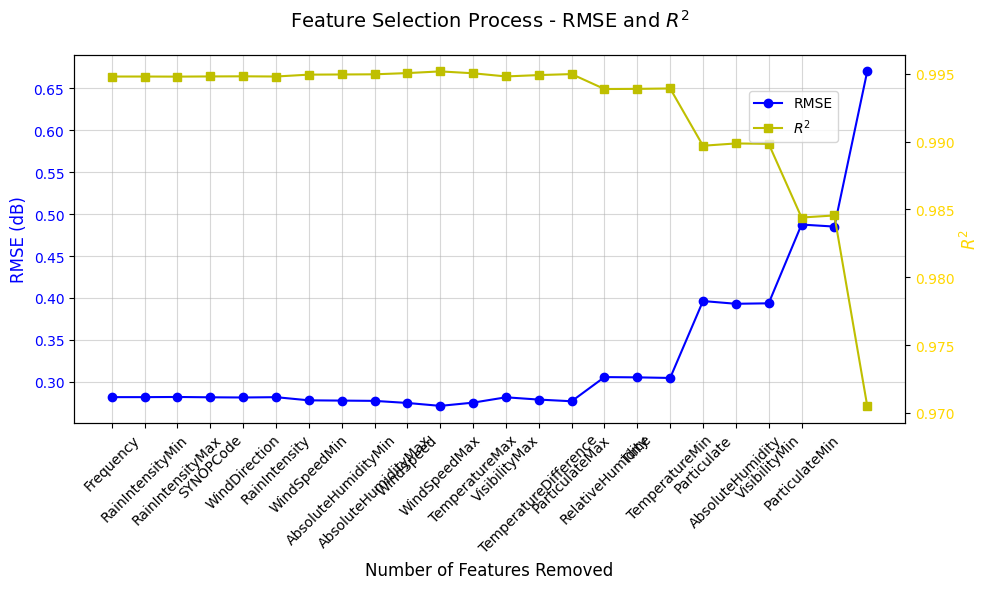

Important Features: ['Distance', 'Temperature', 'Visibility']
Removed Features: ['Frequency', 'RainIntensityMin', 'RainIntensityMax', 'SYNOPCode', 'WindDirection', 'RainIntensity', 'WindSpeedMin', 'AbsoluteHumidityMin', 'AbsoluteHumidityMax', 'WindSpeed', 'WindSpeedMax', 'TemperatureMax', 'VisibilityMax', 'TemperatureDifference', 'ParticulateMax', 'RelativeHumidity', 'Time', 'TemperatureMin', 'Particulate', 'AbsoluteHumidity', 'VisibilityMin', 'ParticulateMin']
Decisions Log:
Removed: Frequency
Removed: RainIntensityMin
Removed: RainIntensityMax
Removed: SYNOPCode
Removed: WindDirection
Removed: RainIntensity
Removed: WindSpeedMin
Removed: AbsoluteHumidityMin
Removed: AbsoluteHumidityMax
Removed: WindSpeed
Removed: WindSpeedMax
Removed: TemperatureMax
Removed: VisibilityMax
Removed: TemperatureDifference
Removed: ParticulateMax
Removed: RelativeHumidity
Removed: Time
Removed: TemperatureMin
Removed: Particulate
Removed: AbsoluteHumidity
Removed: VisibilityMin
Removed: ParticulateMin
St

In [14]:
important_features, removed_features, rmse_list, r2_list, decisions = feature_selection(
    data=fso_data,
    target_column='FSO_Att',
    drop_columns=[],  
    rmse_threshold=0.1,  
    r2_threshold=0.02    
)


In [15]:
import os
from sklearn.model_selection import GridSearchCV

os.environ["PYTHONIOENCODING"] = "utf-8"

weather_categories = {
    0: "Clear",
    3: "Dust Strom",
    4: "Fog",
    5: "Drizzle",
    6: "Rain",
    7: "Snow",
    8: "Showers"
}

for code in weather_categories.keys():
    fso_data[f'SYNOPCode{code}'] = (fso_data['SYNOPCode'] == code).astype(int)

def general_model_evaluation(data, target_column, features):
    # 1. 数据划分
    X = data[features]
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 2. 定义超参数网格
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    # 3. 初始化随机森林模型
    rf = RandomForestRegressor(random_state=42)

    # 4. 使用 GridSearchCV 进行超参数优化
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=1)
    grid_search.fit(X_train, y_train)

    # 获取最优参数
    best_params = grid_search.best_params_
    print(f"Optimal Parameters: {best_params}")

    # 5. 使用最佳参数训练模型
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # 6. 在训练集上评估模型性能
    y_train_pred = best_model.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)

    print(f"Training RMSE: {train_rmse}, R^2: {train_r2}")

    # 7. 在测试集上评估模型性能
    y_test_pred = best_model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Test RMSE: {test_rmse}, R^2: {test_r2}")

    return best_model, best_params, train_rmse, train_r2, test_rmse, test_r2

In [16]:
general_model, general_params, train_rmse, train_r2, test_rmse, test_r2 = general_model_evaluation(
    data=fso_data,
    target_column='FSO_Att',
    features=['Distance', 'Temperature', 'Visibility']  
)

# 打印结果
print("General Model 最优超参数:", general_params)
print("训练集性能 -> RMSE:", train_rmse, ", R²:", train_r2)
print("测试集性能 -> RMSE:", test_rmse, ", R²:", test_r2)

Optimal Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training RMSE: 1.1602074809082261, R^2: 0.9123385073612887
Test RMSE: 1.7890877187178773, R^2: 0.7861290250716451
General Model 最优超参数: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
训练集性能 -> RMSE: 1.1602074809082261 , R²: 0.9123385073612887
测试集性能 -> RMSE: 1.7890877187178773 , R²: 0.7861290250716451


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
print(fso_data.columns)


Index(['FSO_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin', 'SYNOPCode0', 'SYNOPCode3',
       'SYNOPCode4', 'SYNOPCode5', 'SYNOPCode6', 'SYNOPCode7', 'SYNOPCode8'],
      dtype='object')


## Special Model

In [23]:
import tempfile
import os
os.environ["PYTHONIOENCODING"] = "utf-8"
os.environ['TMP'] = r'D:\Temp'
os.environ['TEMP'] = r'D:\Temp'
tempfile.tempdir = r'D:\Temp'

weather_categories = {
    0: "Clear",
    3: "Dust Strom",
    4: "Fog",
    5: "Drizzle",
    6: "Rain",
    7: "Snow",
    8: "Showers"
}


synop_columns = ['SYNOP_0', 'SYNOP_3', 'SYNOP_4', 'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8']

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def prepare_synop_data(data, target_column, synop_column, weather_categories):
    """
    按照 SYNOPCode 划分数据集并存储训练集和测试集。
    """
    synop_data_splits = {}
    
    for code, synop_name in weather_categories.items():
        print(f"准备数据集 - SYNOPCode {code} ({synop_name})")
        
        # 筛选当前 SYNOPCode 的数据
        filtered_data = data[data[synop_column] == code].copy()

        # 如果没有数据，跳过
        if filtered_data.empty:
            print(f"SYNOPCode {code} ({synop_name}) 没有数据")
            continue

        # 数据集划分前，移除所有与其他 SYNOPCode 相关的特征
        drop_columns = [synop_column]  # 添加原始 SYNOPCode 列
        drop_columns += [col for col in filtered_data.columns if 'SYNOPCode' in col]
        
        X = filtered_data.drop(columns=[target_column] + drop_columns, errors='ignore')
        y = filtered_data[target_column]
        
        # 划分训练集和测试集
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # 存储分割后的数据
        synop_data_splits[synop_name] = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        }
        
        print(f"训练集大小: {X_train.shape}, 测试集大小: {X_test.shape}, 剩余特征: {X_train.columns.tolist()}")

    return synop_data_splits
def train_individual_synop(data_splits, optimal_params):
    results = {}
    trained_models = {}

    for synop_name, splits in data_splits.items():
        print(f"正在训练模型 - SYNOPCode: {synop_name}")
        X_train = splits['X_train']
        X_test = splits['X_test']
        y_train = splits['y_train']
        y_test = splits['y_test']

        model = RandomForestRegressor(**optimal_params)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_r2 = r2_score(y_train, y_train_pred)

        y_test_pred = model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)

        feature_importances = model.feature_importances_
        sorted_indices = feature_importances.argsort()[::-1]
        selected_feature_names = X_train.columns[sorted_indices].tolist()

        test_rmse_values = [test_rmse]
        test_r2_values = [test_r2]

        print(f"--- {synop_name} --- Initial Performance ---")
        print(f"Training RMSE: {train_rmse:.4f}, Training R²: {train_r2:.4f}")
        print(f"Testing RMSE: {test_rmse:.4f}, Testing R²: {test_r2:.4f}")
        print(f"Initial Features: {selected_feature_names}")

        while len(sorted_indices) > 1: 
            model.fit(X_train.iloc[:, sorted_indices], y_train)
            y_test_pred = model.predict(X_test.iloc[:, sorted_indices])
            test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
            test_r2 = r2_score(y_test, y_test_pred)
            test_rmse_values.append(test_rmse)
            test_r2_values.append(test_r2)
            print(f"Remaining features: {selected_feature_names[:-1]}")
            print(f"Testing RMSE: {test_rmse:.4f}, Testing R²: {test_r2:.4f}")
            sorted_indices = sorted_indices[:-1]

        results[synop_name] = {
            'Training RMSE': train_rmse,
            'Training R²': train_r2,
            'Testing RMSE': test_rmse_values[-1],
            'Testing R²': test_r2_values[-1],
            'Features': selected_feature_names,
            'Feature Selection RMSE': test_rmse_values,
            'Feature Selection R²': test_r2_values
        }
        print(f"--- {synop_name} --- Completed ---")

    return results, trained_models


def plot_feature_selection(results, weather_categories):
    """
    绘制特征选择过程的图表。
    """
    for synop_code, synop_name in weather_categories.items():
        if synop_name not in results:
            print(f"--- {synop_name} --- 无数据 ---")
            continue

        metrics = results[synop_name]
        rmse_values = metrics['Feature Selection RMSE']
        r2_values = metrics['Feature Selection R²']
        features = metrics['Features']

        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax2 = ax1.twinx()

        ax1.plot(range(len(rmse_values)), rmse_values, 'b-o', label='RMSE')
        ax1.set_xlabel('Removed Features', fontsize=12)
        ax1.set_ylabel('RMSE', color='blue', fontsize=12)
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(alpha=0.5)

        ax1.set_xticks(range(len(features)))
        ax1.set_xticklabels(features, fontsize=10, rotation=90)

        ax2.plot(range(len(r2_values)), r2_values, 'r-s', label='$R^2$', markersize=6)
        ax2.set_ylabel('$R^2$', color='red', fontsize=12)
        ax2.tick_params(axis='y', labelcolor='red')

        plt.title(f'Feature Selection Process - {synop_name}', fontsize=14, pad=20)
        fig.tight_layout()
        fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85), fontsize=10)

        plt.show()










## 调用Special 

In [ ]:


weather_categories = {
    0: 'Clear',
    3: 'Dust Storm',
    4: 'Fog',
    5: 'Drizzle',
    6: 'Rain',
    7: 'Snow',
    8: 'Showers'
}

# 提前划分数据集
synop_data_splits = prepare_synop_data(fso_data, 'FSO_Att', 'SYNOPCode', weather_categories)

# 使用划分好的数据集训练模型
results, trained_models = train_individual_synop(synop_data_splits, optimal_params)


准备数据集 - SYNOPCode 0 (Clear)
训练集大小: (39874, 24), 测试集大小: (17090, 24), 剩余特征: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
准备数据集 - SYNOPCode 3 (Dust Storm)
训练集大小: (133, 24), 测试集大小: (58, 24), 剩余特征: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
准备数据集 - SYNOPCode 4 (Fog

In [252]:
for synop_name, metrics in results.items():
    print(f"--- {synop_name} ---")
    print(metrics)

--- Clear ---
{'Training RMSE': 0.4938325467692409, 'Training R²': 0.9802401505460058, 'Testing RMSE': 1.6328919052287831, 'Testing R²': 0.7871808300000558, 'Features': ['Distance', 'Temperature', 'VisibilityMin', 'TemperatureMax', 'TemperatureMin', 'Visibility', 'AbsoluteHumidity', 'VisibilityMax', 'Time', 'TemperatureDifference', 'RelativeHumidity', 'AbsoluteHumidityMax', 'WindSpeedMax', 'AbsoluteHumidityMin', 'WindSpeed', 'WindSpeedMin', 'Particulate', 'ParticulateMin', 'ParticulateMax', 'WindDirection', 'Frequency', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin'], 'Feature Selection RMSE': [0.8685220723468122, 0.8682111033913638, 0.868512968656972, 0.868331472961017, 0.8680365705748291, 0.8680373896004994, 0.860810470609347, 0.8607312232069988, 0.8603741494946695, 0.9084987869458321, 0.9075862441653856, 0.9167726890099513, 0.9115508602870394, 0.9226598281988864, 0.9139140484915226, 0.927769639769912, 0.969580677855652, 1.1712270998971879, 1.1599440370491805, 1.380876475212

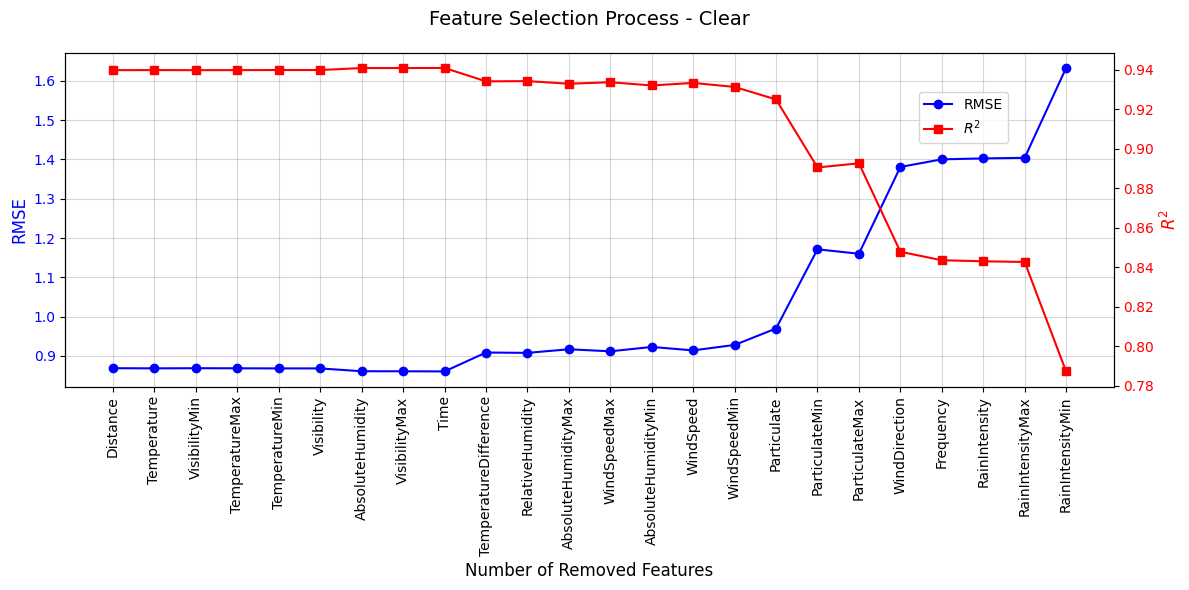

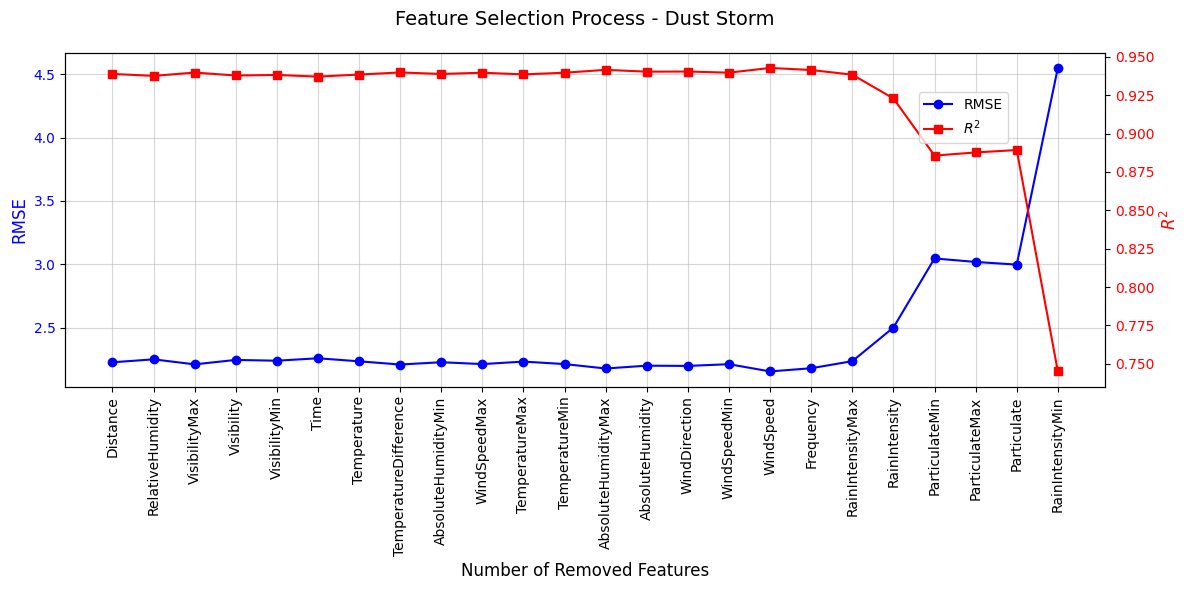

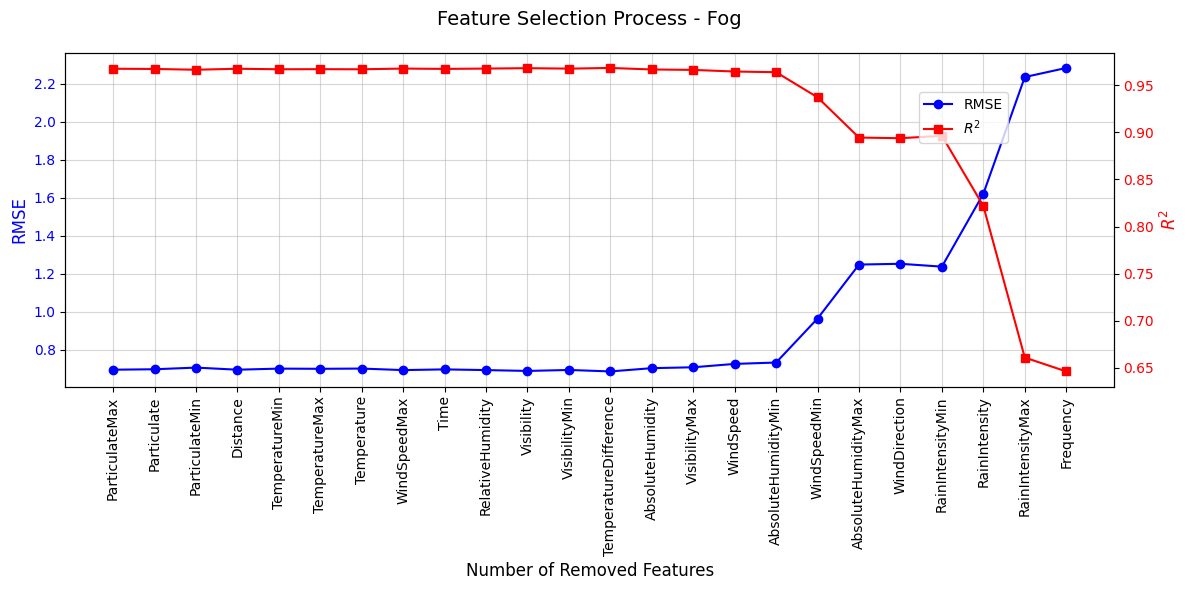

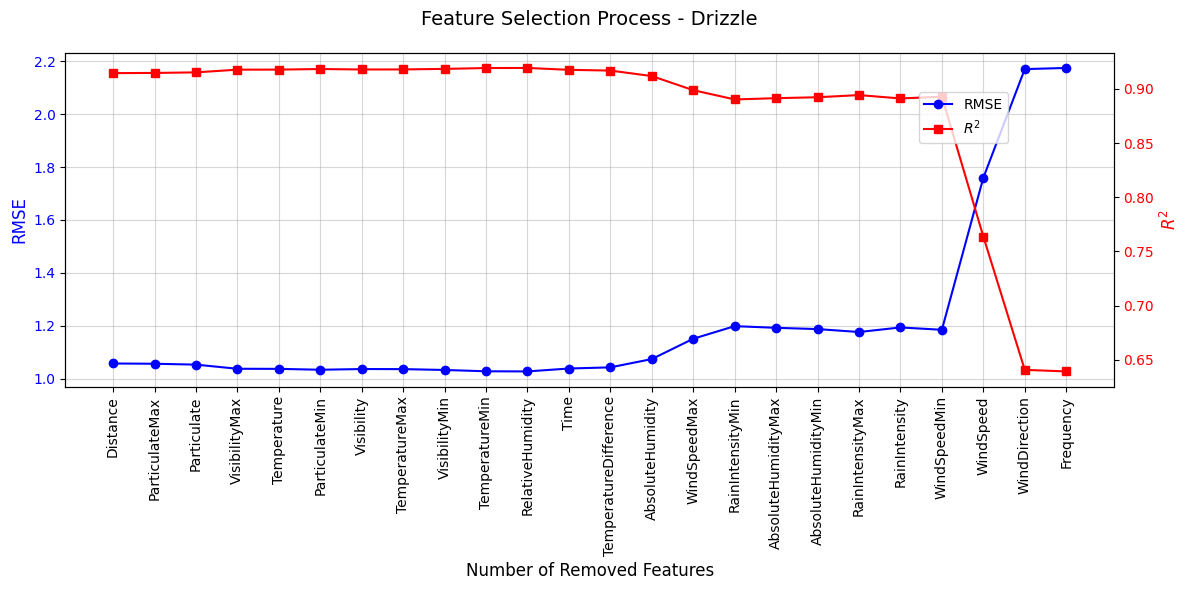

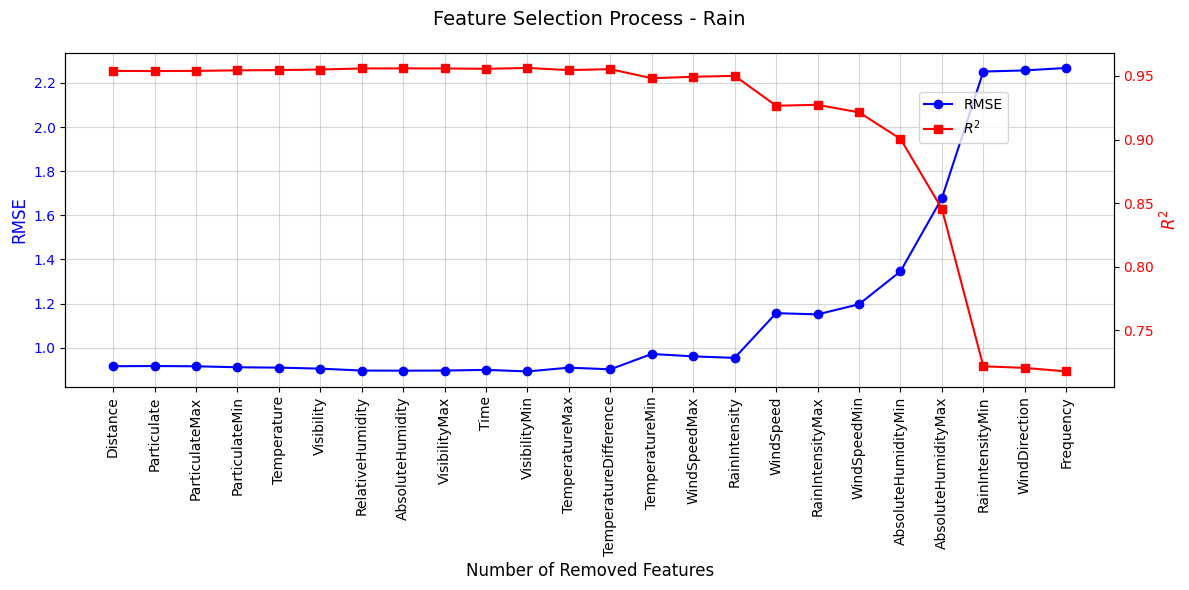

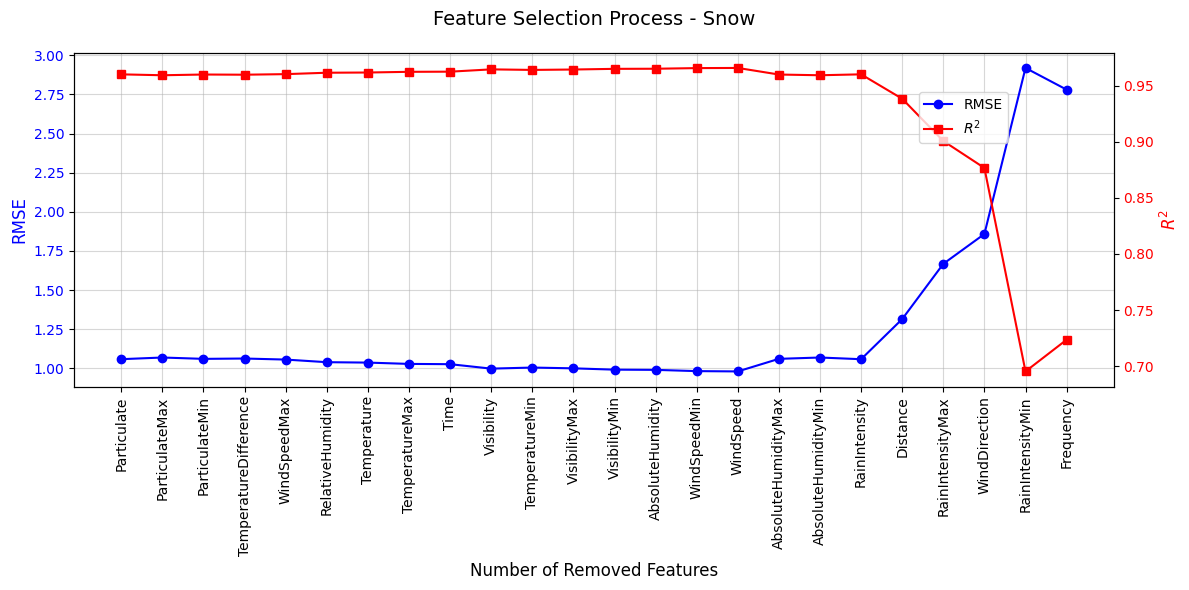

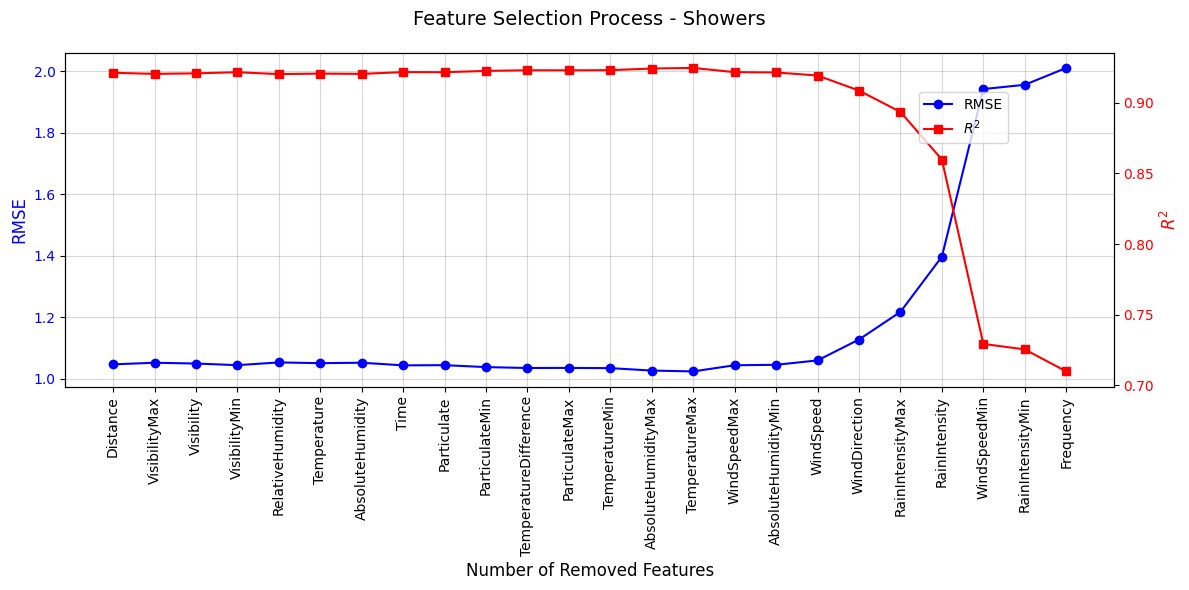

In [ ]:
plot_feature_selection(results, weather_categories={
        0: 'Clear',
        3: 'Dust Storm',
        4: 'Fog',
        5: 'Drizzle',
        6: 'Rain',
        7: 'Snow',
        8: 'Showers'
    })


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def optimize_hyperparameters_for_each_code(data_splits):
    """
    针对每个 SYNOPCode 独立优化超参数。
    """
    optimal_params_per_code = {}
    model_results = {}

    # 定义超参数网格
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    for synop_name, splits in data_splits.items():
        print(f"正在优化超参数 - SYNOPCode: {synop_name}")
        
        X_train = splits['X_train']
        y_train = splits['y_train']
        X_test = splits['X_test']
        y_test = splits['y_test']
        
        # 定义随机森林模型
        rf = RandomForestRegressor(random_state=42)
        
        # 使用 GridSearchCV 优化超参数
        grid_search = GridSearchCV(
            estimator=rf, 
            param_grid=param_grid, 
            cv=3, 
            scoring='neg_mean_squared_error',
            n_jobs=-1, 
            verbose=1
        )
        grid_search.fit(X_train, y_train)
        
        # 获取最佳超参数和模型
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        optimal_params_per_code[synop_name] = best_params

        # 使用最佳超参数计算性能
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        
        train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
        train_r2 = r2_score(y_train, y_train_pred)
        test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
        test_r2 = r2_score(y_test, y_test_pred)

        # 保存结果
        model_results[synop_name] = {
            'Training RMSE': train_rmse,
            'Training R²': train_r2,
            'Testing RMSE': test_rmse,
            'Testing R²': test_r2
        }

        print(f"--- {synop_name} ---")
        print(f"Optimal Parameters: {best_params}")
        print(f"Training RMSE: {train_rmse:.4f}, Training R²: {train_r2:.4f}")
        print(f"Testing RMSE: {test_rmse:.4f}, Testing R²: {test_r2:.4f}")
        print("\n")

    return optimal_params_per_code, model_results


In [29]:
optimal_params_per_code, model_results = optimize_hyperparameters_for_each_code(synop_data_splits)


正在优化超参数 - SYNOPCode: Clear
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Clear ---
Optimal Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Training RMSE: 0.3164, Training R²: 0.9919
Testing RMSE: 0.8337, Testing R²: 0.9445


正在优化超参数 - SYNOPCode: Dust Storm
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Dust Storm ---
Optimal Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Training RMSE: 0.9730, Training R²: 0.9843
Testing RMSE: 2.0398, Testing R²: 0.9487


正在优化超参数 - SYNOPCode: Fog
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Fog ---
Optimal Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Training RMSE: 0.2878, Training R²: 0.9947
Testing RMSE: 0.6350, Testing R²: 0.9727


正在优化超参数 - SYNOPCode: Drizzle
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Drizzle ---
Optimal Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Training RMSE: 0.3525, Training R²: 0.9902
Testing RMSE: 0.9962, Testing R²: 0.9243


正在优化超参数 - SYNOPCode: Rain
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Rain ---
Optimal Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Training RMSE: 0.3337, Training R²: 0.9941
Testing RMSE: 0.8714, Testing R²: 0.9583


正在优化超参数 - SYNOPCode: Snow
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Snow ---
Optimal Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Training RMSE: 0.5083, Training R²: 0.9907
Testing RMSE: 0.9501, Testing R²: 0.9677


正在优化超参数 - SYNOPCode: Showers
Fitting 3 folds for each of 27 candidates, totalling 81 fits
--- Showers ---
Optimal Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Training RMSE: 0.3916, Training R²: 0.9908
Testing RMSE: 0.9729, Testing R²: 0.9320




C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
rfl_data = data.drop("FSO_Att", axis = 1).copy()
rfl_data['SYNOPCode'] = rfl_data['SYNOPCode'].astype('category')

# 检查转换结果
print(rfl_data.dtypes)  # 检查列的数据类型
print(rfl_data['SYNOPCode'].head())  # 查看前几行数据

RFL_Att                   float64
AbsoluteHumidity          float64
AbsoluteHumidityMax       float64
AbsoluteHumidityMin       float64
Distance                  float64
Frequency                   int64
Particulate               float64
ParticulateMax            float64
ParticulateMin            float64
RainIntensity             float64
RainIntensityMax          float64
RainIntensityMin          float64
RelativeHumidity          float64
SYNOPCode                category
Temperature               float64
TemperatureDifference     float64
TemperatureMax            float64
TemperatureMin            float64
Time                        int64
Visibility                float64
VisibilityMax             float64
VisibilityMin             float64
WindDirection             float64
WindSpeed                 float64
WindSpeedMax              float64
WindSpeedMin              float64
dtype: object
0    0
1    0
2    0
3    0
4    0
Name: SYNOPCode, dtype: category
Categories (7, int64): [0, 3, 4, 5

In [32]:
print(rfl_data['SYNOPCode'].value_counts())

SYNOPCode
0    56964
6    25018
5     6605
8     1716
4      466
7      419
3      191
Name: count, dtype: int64


In [33]:
print("\nRF Dataset Summary Statistics:")
rfl_data.describe()


RF Dataset Summary Statistics:


,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
count,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,9.137900e+04,91379.000000,91379.000000,91379.000000,91379.000000,...,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000
mean,11.619098,9.553919,10.032760,9.076251,3297.930328,7.850005e+10,27.065979,28.417120,25.717089,0.246973,...,13.166020,11.904558,11.373193,32986.417484,34636.684647,31331.618978,89.043304,0.739065,1.851020,0.702242
std,3.438873,5.858577,6.162798,5.575927,1224.305893,5.000027e+09,72.134023,75.761896,68.595239,1.642323,...,9.589755,8.694028,6.942229,24713.874445,25978.845228,23497.873065,26.415610,0.871314,1.762698,0.828796
min,0.027142,1.141556,1.238270,1.049744,2012.000148,7.350000e+10,0.000000,0.000000,0.000000,0.000000,...,-6.693373,-7.270075,0.000000,10.151990,11.029667,9.484346,0.000000,0.000000,0.000000,0.000000
25%,10.829331,4.958993,5.205861,4.709511,2019.431812,7.350000e+10,0.000000,0.000000,0.000000,0.000000,...,4.905387,4.438425,5.000000,11158.598400,11721.447542,10588.793237,82.976727,0.076749,0.512667,0.072912
50%,11.856560,6.870737,7.205499,6.524046,2959.863686,8.350000e+10,0.000000,0.000000,0.000000,0.000000,...,10.803943,9.774467,11.000000,26378.636210,27686.214032,25047.188462,90.867362,0.437995,1.323101,0.416274
75%,12.847944,14.049470,14.782679,13.379256,4820.890157,8.350000e+10,16.947618,17.775980,16.038090,0.000000,...,22.470382,20.322434,17.000000,53493.821285,56092.212376,50797.690402,98.482652,1.088621,2.681788,1.036574
max,46.893150,24.790883,26.407305,24.268431,4827.999971,8.350000e+10,1621.001906,1753.747866,1500.666382,87.264777,...,40.771383,36.724191,23.000000,75004.999150,82503.130084,74999.343414,360.000000,7.799086,16.421115,7.252319


In [34]:
def feature_selection(data, target_column, drop_columns, rmse_threshold=0.1, r2_threshold=0.02):
    # 1. 移除指定列
    data = data.drop(columns=drop_columns, errors='ignore')
    
    # 2. 分离特征和目标变量
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # 3. 初始化随机森林模型
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    
    # 记录重要特征和性能指标
    rmse_list = []
    r2_list = []
    removed_features = []
    decisions = []  # 用于记录每一步的选择和原因
    
    # 当前特征列表
    current_features = list(X.columns)
    
    # 初始化基线性能
    model.fit(X[current_features], y)
    baseline_rmse = mean_squared_error(y, model.predict(X[current_features]), squared=False)
    baseline_r2 = r2_score(y, model.predict(X[current_features]))
    rmse_list.append(baseline_rmse)
    r2_list.append(baseline_r2)

    print(f"Initial RMSE: {baseline_rmse}, R²: {baseline_r2}")
    
    while len(current_features) > 1:
        # 4. 训练模型
        model.fit(X[current_features], y)
        
        # 5. 预测并计算性能
        y_pred = model.predict(X[current_features])
        rmse = mean_squared_error(y, y_pred, squared=False)
        r2 = r2_score(y, y_pred)
        
        # 记录当前性能
        rmse_list.append(rmse)
        r2_list.append(r2)
        
        # 找到最不重要的特征
        feature_importances = model.feature_importances_
        least_important_feature_idx = np.argmin(feature_importances)
        least_important_feature = current_features[least_important_feature_idx]
        
        # 计算 RMSE 和 R² 的变化
        rmse_increase = rmse - baseline_rmse
        r2_decrease = baseline_r2 - r2

        # 打印当前状态
        print(f"Removing feature: {least_important_feature}")
        print(f"RMSE increase: {rmse_increase:.3f}, R² decrease: {r2_decrease:.3f}")
        
        # 决策是否移除特征
        if rmse_increase > rmse_threshold or r2_decrease > r2_threshold:
            print(f"Stopping selection. RMSE increase ({rmse_increase:.3f}) > {rmse_threshold} or R² decrease ({r2_decrease:.3f}) > {r2_threshold}")
            decisions.append(f"Stop: RMSE increase {rmse_increase:.3f}, R² decrease {r2_decrease:.3f}")
            break
        else:
            # 移除特征并更新基线性能
            removed_features.append(least_important_feature)
            current_features.pop(least_important_feature_idx)
            baseline_rmse = rmse
            baseline_r2 = r2
            decisions.append(f"Removed: {least_important_feature}")

    # 绘制 RMSE 和 R² 变化
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # 绘制 RMSE 曲线
    ax1.plot(range(len(rmse_list)), rmse_list, 'b-o', label='RMSE')
    ax1.set_xlabel('Number of Features Removed', fontsize=12)
    ax1.set_ylabel('RMSE (dB)', color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.tick_params(axis='x', rotation=45)  # 旋转 X 轴标签
    ax1.grid(alpha=0.5)

    ax1.set_xticks(range(len(removed_features)))  
    ax1.set_xticklabels(removed_features, fontsize=10)
    # 绘制 R² 曲线
    ax2 = ax1.twinx()
    ax2.plot(range(len(r2_list)), r2_list, 'y-s', label='$R^2$', markersize=6)
    ax2.set_ylabel('$R^2$', color='gold', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='gold')

    # 添加标题和图例
    plt.title('Feature Selection Process - RMSE and $R^2$', fontsize=14, pad=20)
    fig.tight_layout()  # 自动调整布局避免标签重叠
    fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85), fontsize=10)
    plt.show()

    # 输出最终结果
    print("Important Features:", current_features)
    print("Removed Features:", removed_features)
    print("Decisions Log:")
    for decision in decisions:
        print(decision)
    
    return current_features, removed_features, rmse_list, r2_list, decisions


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Initial RMSE: 0.17956326032409334, R²: 0.9972734873278324


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindDirection
RMSE increase: -0.000, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindSpeedMin
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindSpeed
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Particulate
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: WindSpeedMax
RMSE increase: -0.000, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: AbsoluteHumidityMax
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: TemperatureMin
RMSE increase: -0.002, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: VisibilityMin
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: AbsoluteHumidityMin
RMSE increase: -0.002, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: ParticulateMin
RMSE increase: -0.003, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: TemperatureDifference
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: VisibilityMax
RMSE increase: 0.010, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Time
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Frequency
RMSE increase: 0.028, R² decrease: 0.001


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: TemperatureMax
RMSE increase: 0.060, R² decrease: 0.002


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: ParticulateMax
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RelativeHumidity
RMSE increase: 0.001, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: SYNOPCode
RMSE increase: 0.004, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Visibility
RMSE increase: 0.000, R² decrease: 0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RainIntensityMin
RMSE increase: 0.046, R² decrease: 0.002


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Temperature
RMSE increase: -0.001, R² decrease: -0.000


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: RainIntensityMax
RMSE increase: 0.077, R² decrease: 0.005


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Removing feature: Distance
RMSE increase: -0.001, R² decrease: -0.000
Removing feature: RainIntensity
RMSE increase: 0.424, R² decrease: 0.043
Stopping selection. RMSE increase (0.424) > 0.1 or R² decrease (0.043) > 0.02


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


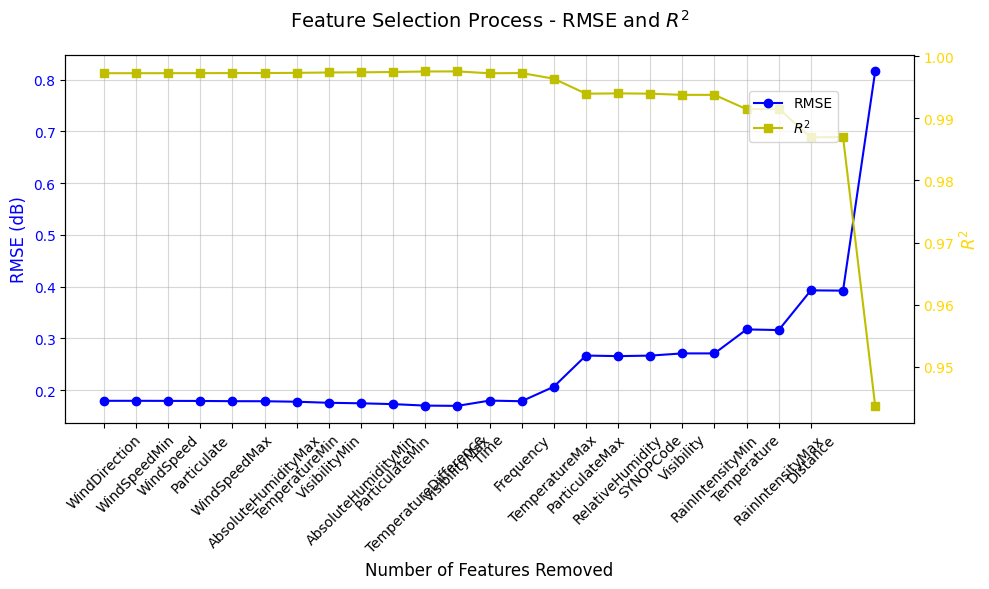

Important Features: ['AbsoluteHumidity', 'RainIntensity']
Removed Features: ['WindDirection', 'WindSpeedMin', 'WindSpeed', 'Particulate', 'WindSpeedMax', 'AbsoluteHumidityMax', 'TemperatureMin', 'VisibilityMin', 'AbsoluteHumidityMin', 'ParticulateMin', 'TemperatureDifference', 'VisibilityMax', 'Time', 'Frequency', 'TemperatureMax', 'ParticulateMax', 'RelativeHumidity', 'SYNOPCode', 'Visibility', 'RainIntensityMin', 'Temperature', 'RainIntensityMax', 'Distance']
Decisions Log:
Removed: WindDirection
Removed: WindSpeedMin
Removed: WindSpeed
Removed: Particulate
Removed: WindSpeedMax
Removed: AbsoluteHumidityMax
Removed: TemperatureMin
Removed: VisibilityMin
Removed: AbsoluteHumidityMin
Removed: ParticulateMin
Removed: TemperatureDifference
Removed: VisibilityMax
Removed: Time
Removed: Frequency
Removed: TemperatureMax
Removed: ParticulateMax
Removed: RelativeHumidity
Removed: SYNOPCode
Removed: Visibility
Removed: RainIntensityMin
Removed: Temperature
Removed: RainIntensityMax
Removed: D

In [134]:
important_features, removed_features, rmse_list, r2_list, decisions = feature_selection(
    data=rfl_data,
    target_column='RFL_Att',
    drop_columns=[],  
    rmse_threshold=0.1,  
    r2_threshold=0.02    
)


## RFL_General Model

In [137]:
general_model, general_params, train_rmse, train_r2, test_rmse, test_r2 = general_model_evaluation(
    data=rfl_data,
    target_column='RFL_Att',
    features=['AbsoluteHumidity', 'RainIntensity']  
)

# 打印结果
print("General Model 最优超参数:", general_params)
print("训练集性能 -> RMSE:", train_rmse, ", R²:", train_r2)
print("测试集性能 -> RMSE:", test_rmse, ", R²:", test_r2)

Optimal Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training RMSE: 1.7634838932634869, R^2: 0.7378907174507647
Test RMSE: 1.868939480513448, R^2: 0.7023276525798313
General Model 最优超参数: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
训练集性能 -> RMSE: 1.7634838932634869 , R²: 0.7378907174507647
测试集性能 -> RMSE: 1.868939480513448 , R²: 0.7023276525798313


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


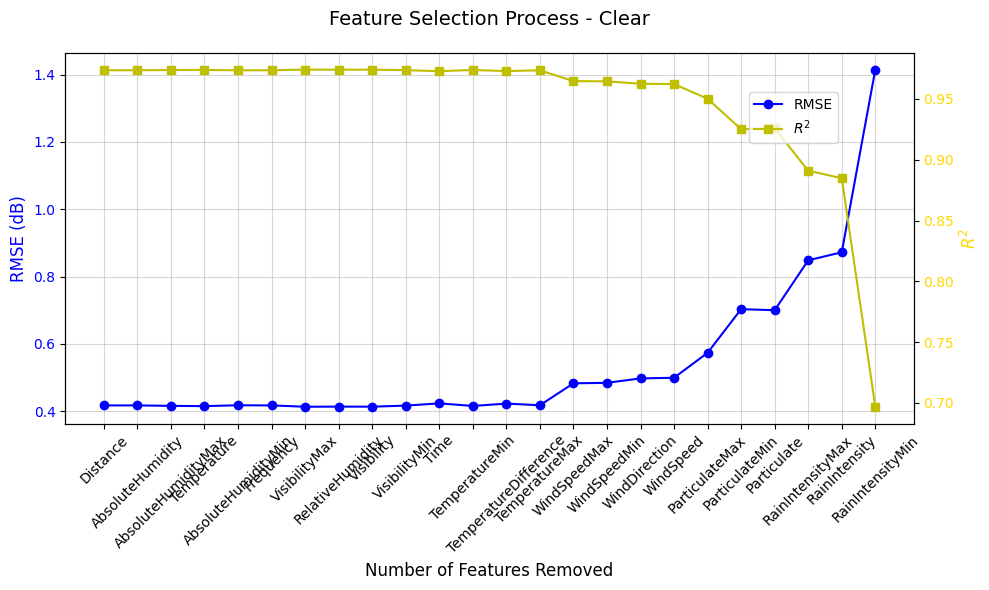

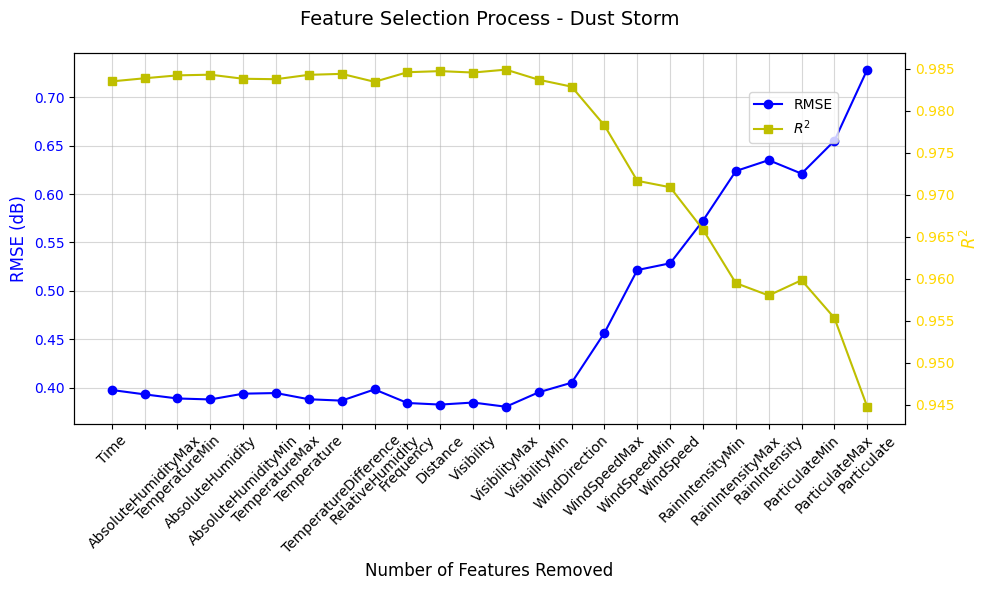

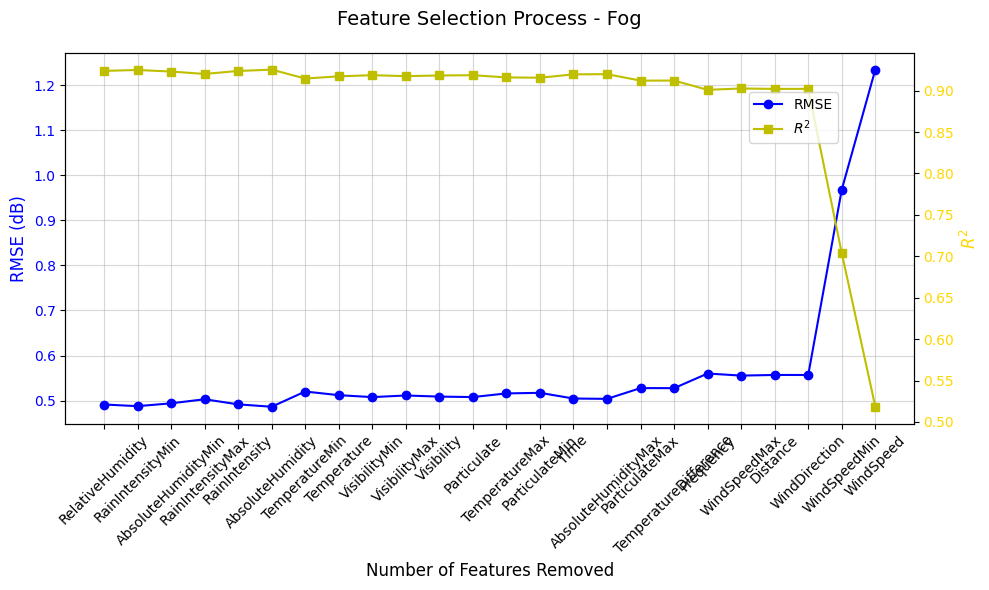

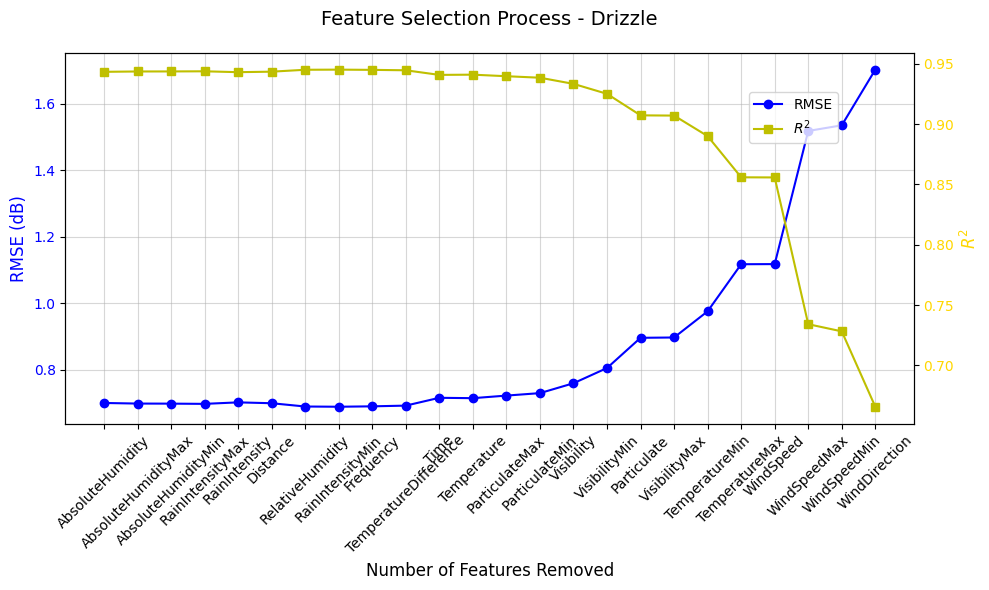

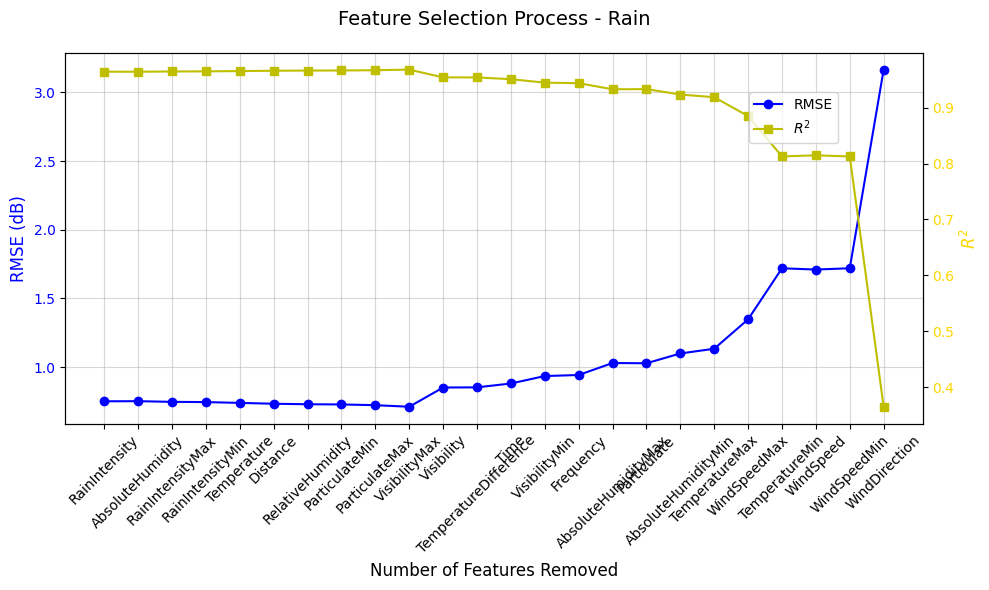

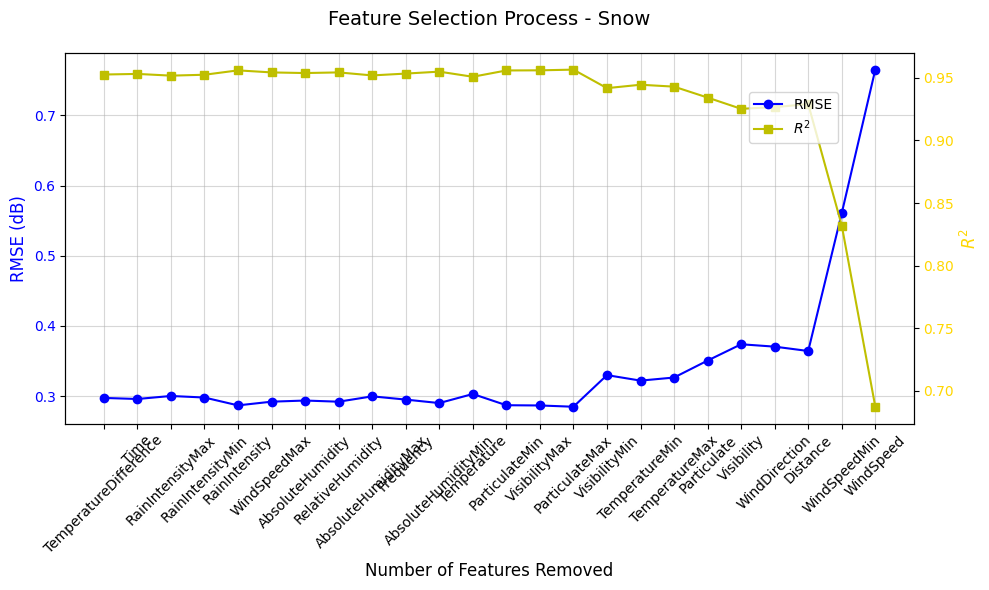

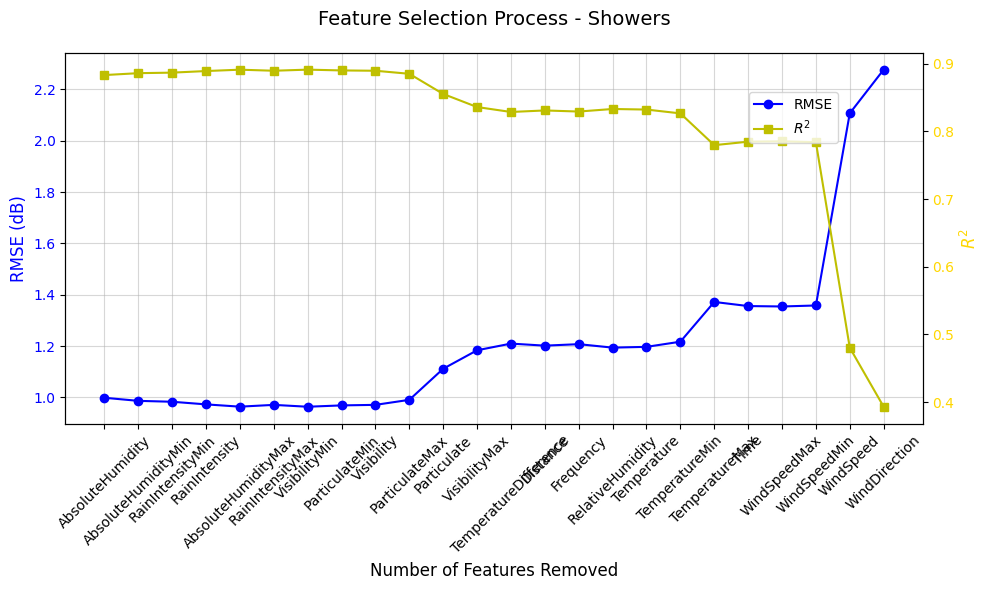

In [138]:
results = special_models_evaluation_with_plots(
    data=rfl_data,
    target_column='RFL_Att',
    synop_column='SYNOPCode',  # 使用数据集中的 SYNOPCode 列
    weather_categories={
        0: 'Clear',
        3: 'Dust Storm',
        4: 'Fog',
        5: 'Drizzle',
        6: 'Rain',
        7: 'Snow',
        8: 'Showers'
    }
)

In [35]:
synop_data_splits = prepare_synop_data(rfl_data, 'RFL_Att', 'SYNOPCode', weather_categories)

准备数据集 - SYNOPCode 0 (Clear)
训练集大小: (39874, 24), 测试集大小: (17090, 24), 剩余特征: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
准备数据集 - SYNOPCode 3 (Dust Storm)
训练集大小: (133, 24), 测试集大小: (58, 24), 剩余特征: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
准备数据集 - SYNOPCode 4 (Fog

In [36]:
optimal_params_per_code, model_results = optimize_hyperparameters_for_each_code(synop_data_splits)

正在优化超参数 - SYNOPCode: Clear
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Clear ---
Optimal Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Training RMSE: 0.1527, Training R²: 0.9964
Testing RMSE: 0.4123, Testing R²: 0.9742


正在优化超参数 - SYNOPCode: Dust Storm
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Dust Storm ---
Optimal Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Training RMSE: 0.2339, Training R²: 0.9937
Testing RMSE: 0.4025, Testing R²: 0.9831


正在优化超参数 - SYNOPCode: Fog
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Fog ---
Optimal Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Training RMSE: 0.1915, Training R²: 0.9856
Testing RMSE: 0.4760, Testing R²: 0.9284


正在优化超参数 - SYNOPCode: Drizzle
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Drizzle ---
Optimal Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Training RMSE: 0.2178, Training R²: 0.9942
Testing RMSE: 0.6989, Testing R²: 0.9436


正在优化超参数 - SYNOPCode: Rain
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Rain ---
Optimal Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Training RMSE: 0.2875, Training R²: 0.9950
Testing RMSE: 0.7510, Testing R²: 0.9643


正在优化超参数 - SYNOPCode: Snow
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Snow ---
Optimal Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Training RMSE: 0.1410, Training R²: 0.9921
Testing RMSE: 0.2954, Testing R²: 0.9534


正在优化超参数 - SYNOPCode: Showers
Fitting 3 folds for each of 27 candidates, totalling 81 fits
--- Showers ---
Optimal Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Training RMSE: 0.3798, Training R²: 0.9854
Testing RMSE: 0.9971, Testing R²: 0.8836




C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\发烧了啊\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
